In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files

In [38]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
cars = pd.read_csv(file_name)

Saving Cars.csv to Cars (1).csv


In [9]:
print(cars.tail())

     HP        MPG  VOL          SP         WT
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615


In [10]:
cars.shape

(81, 5)

In [11]:
cars.info

<bound method DataFrame.info of      HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]>

In [12]:
print(cars.head())

   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


In [13]:
cars.corr()


,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [14]:
cars.isnull()

,HP,MPG,VOL,SP,WT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
76,False,False,False,False,False
77,False,False,False,False,False
78,False,False,False,False,False
79,False,False,False,False,False


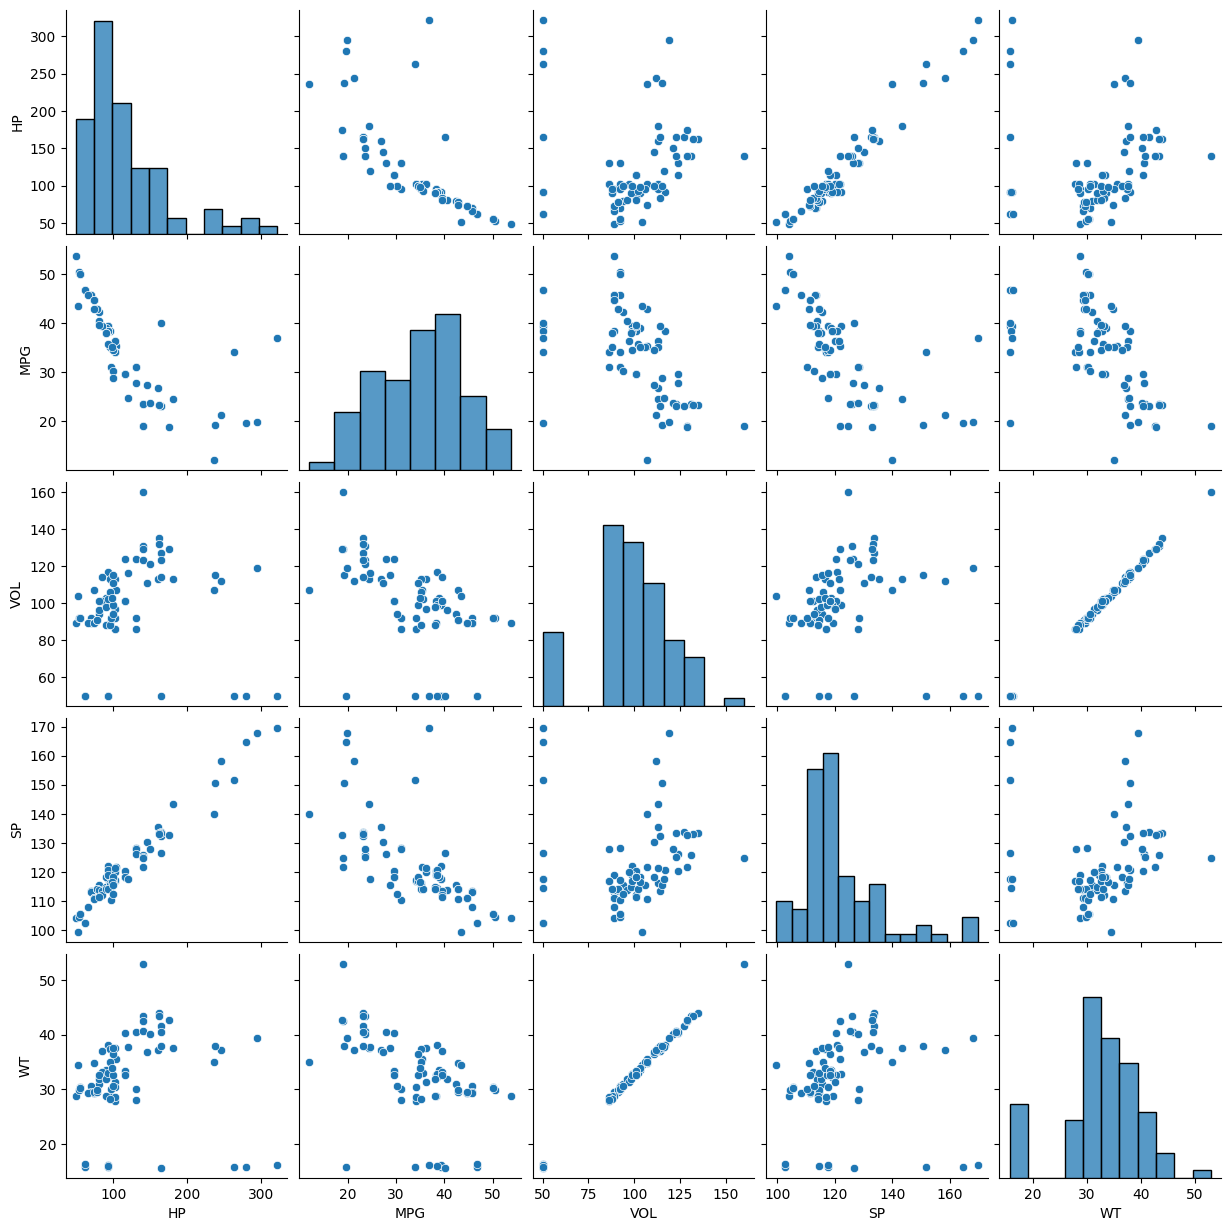

In [15]:
sns.pairplot(cars)
plt.show()

array([[<Axes: title={'center': 'HP'}>, <Axes: title={'center': 'MPG'}>],
       [<Axes: title={'center': 'VOL'}>, <Axes: title={'center': 'SP'}>],
       [<Axes: title={'center': 'WT'}>, <Axes: >]], dtype=object)

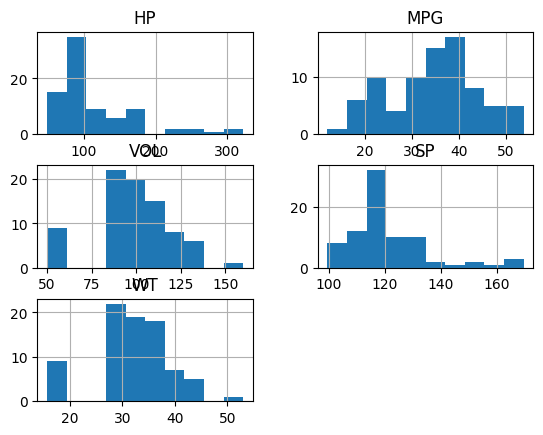

In [16]:
cars.hist()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf  # Corrected import for OLS from formula

# ... (rest of your code for data loading and exploration) ...

# Fitting the OLS model
model = smf.ols('MPG ~ WT + VOL + SP + HP', data=cars).fit()

# ... (rest of your code for using the model) ...

In [18]:
model.params


,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [19]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [20]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [21]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [22]:
ml_w=smf.ols('MPG~WT',data = cars).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [23]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [24]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [25]:
(ml_wv.rsquared,ml_wv.rsquared_adj)

(0.2821095616445982, 0.2637021145072803)

In [26]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()
#t and p-values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [27]:
rsq_hp = smf.ols('HP ~ WT + VOL + SP', data=cars).fit().rsquared
vif_hp = 1/(1 - rsq_hp)

rsq_wt = smf.ols('WT ~ HP + VOL + SP', data=cars).fit().rsquared
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('VOL ~ HP + WT + SP', data=cars).fit().rsquared
vif_vol = 1/(1 - rsq_vol)

rsq_sp = smf.ols('SP ~ HP + WT + VOL', data=cars).fit().rsquared
vif_sp = 1/(1 - rsq_sp)

d1 = {'Variables':['Hp','Wt','Vol','Sp'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,Wt,639.533818
2,Vol,638.806084
3,Sp,20.007639


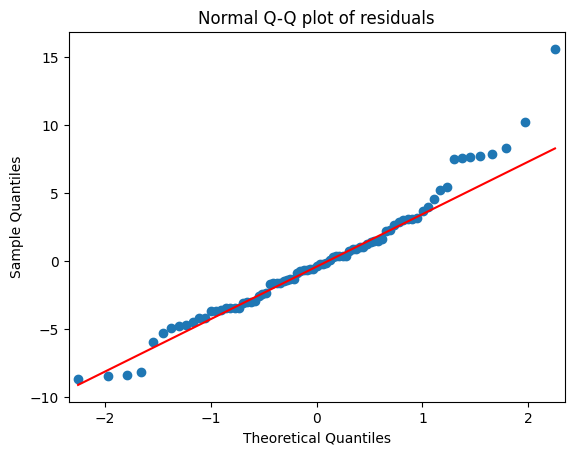

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals" )
plt.show()

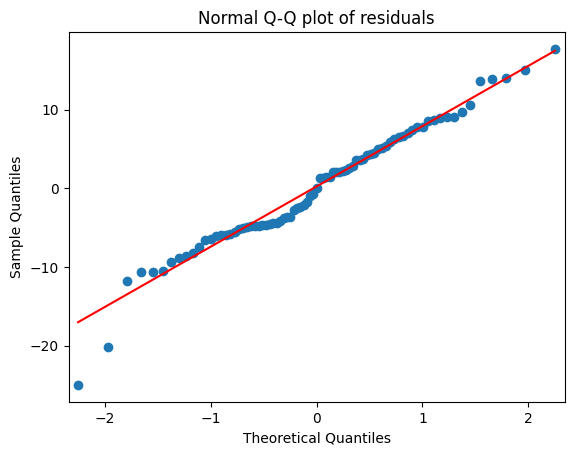

In [29]:
import statsmodels.api as sm
qqplot=sm.qqplot(ml_wv.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

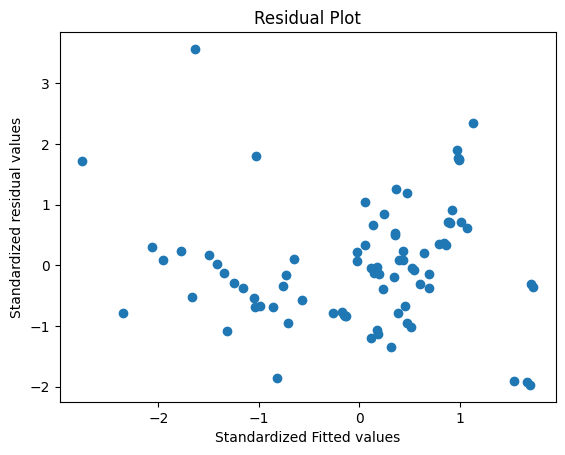

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

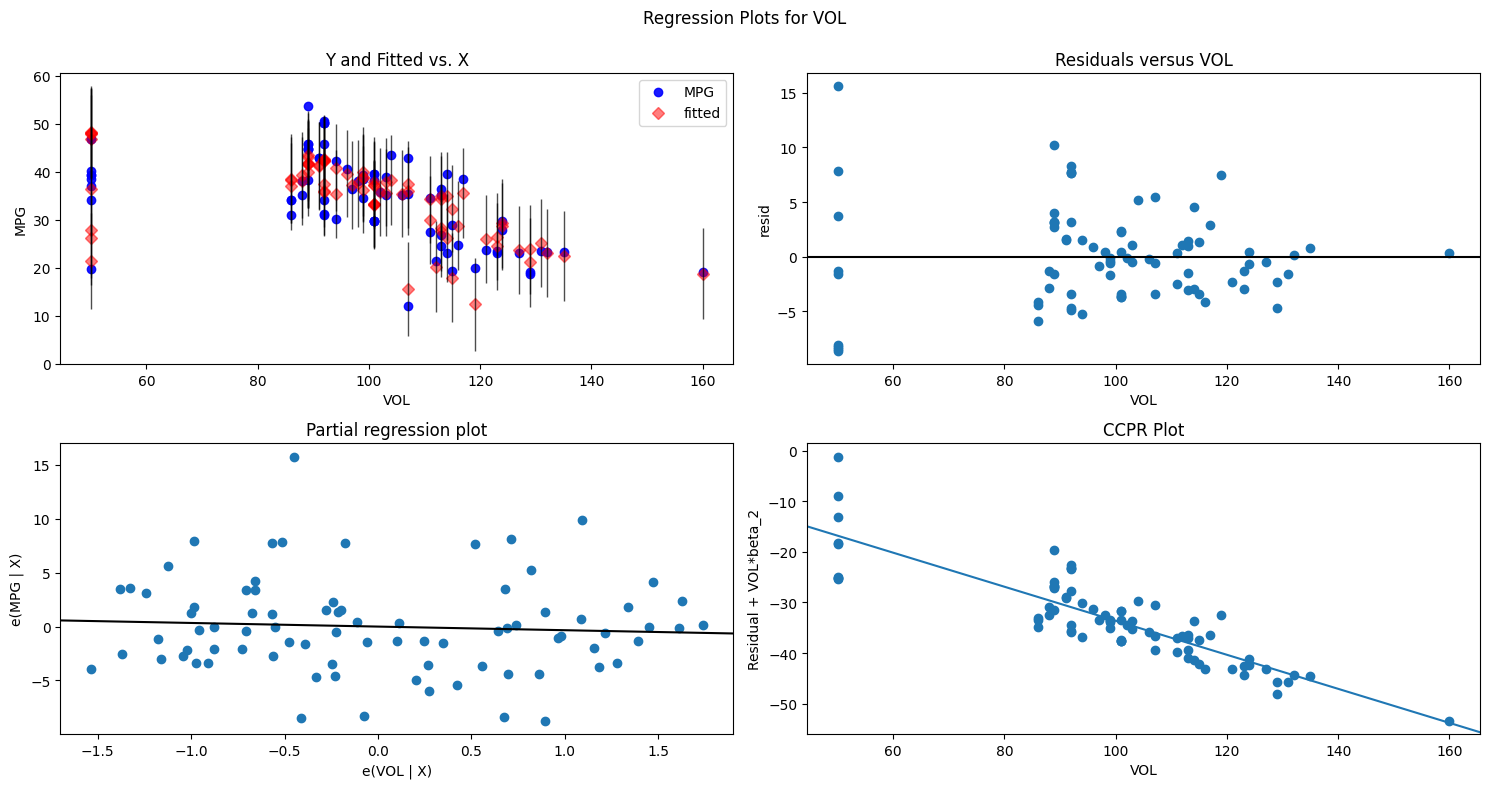

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

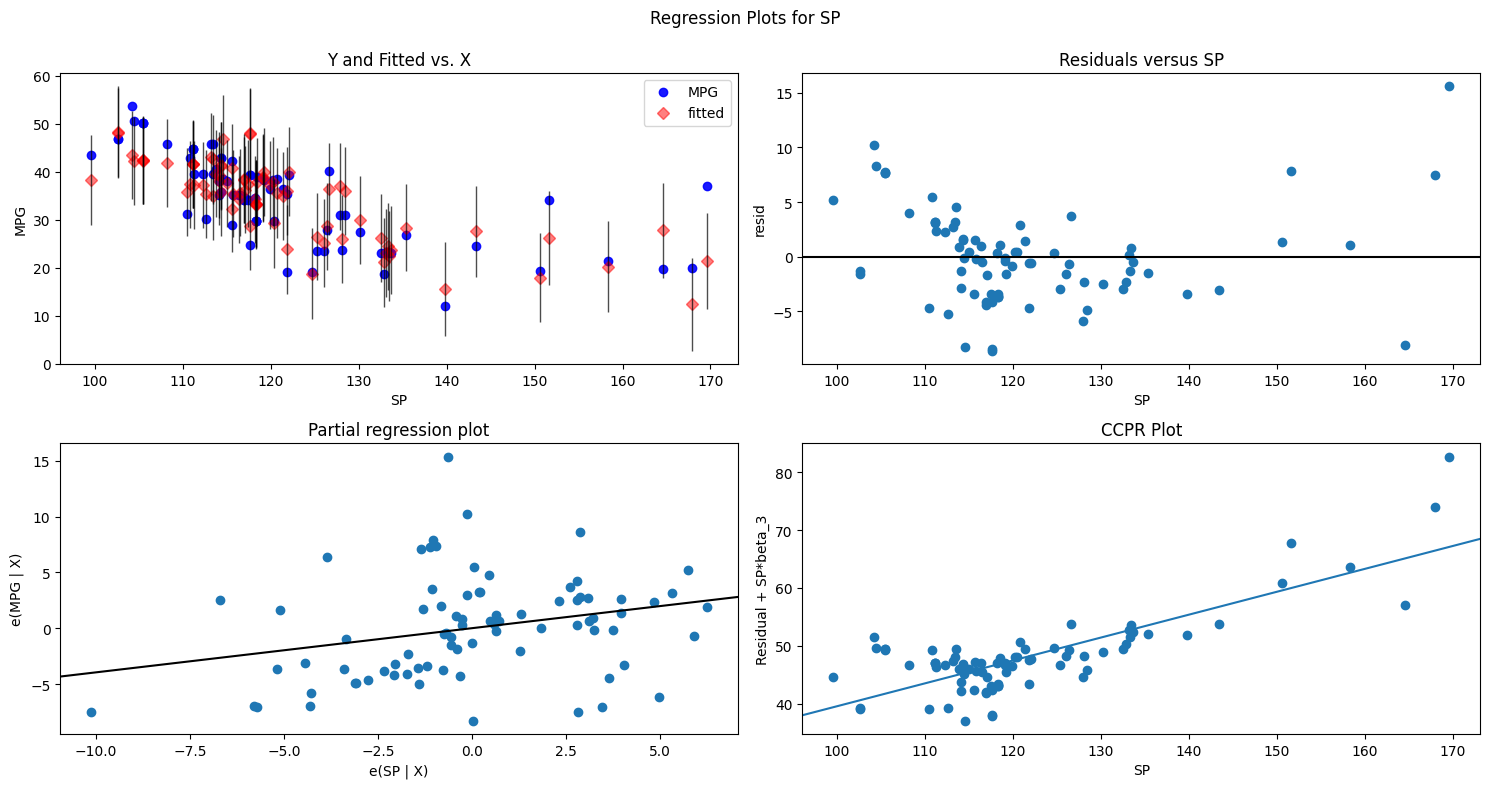

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

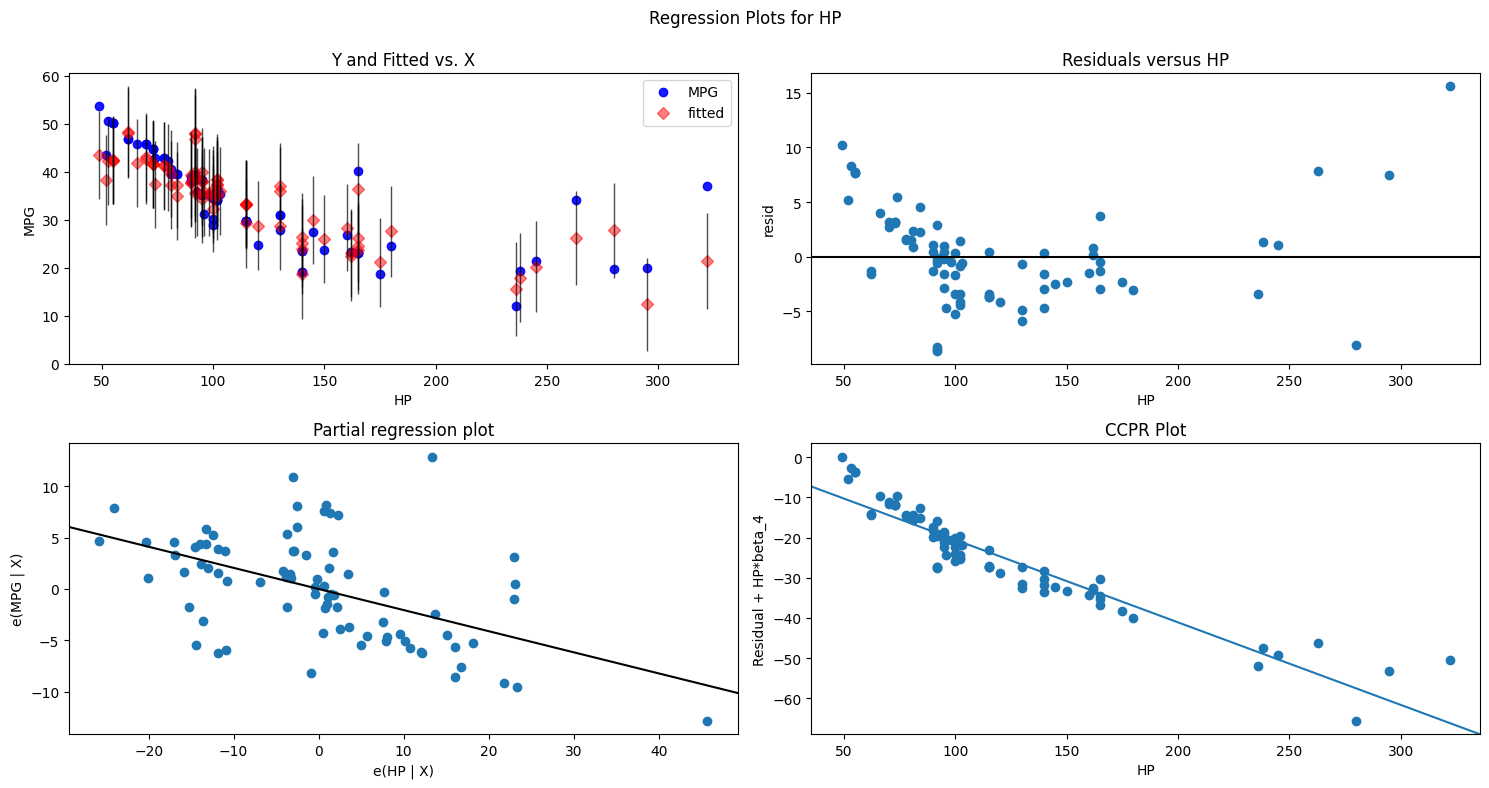

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

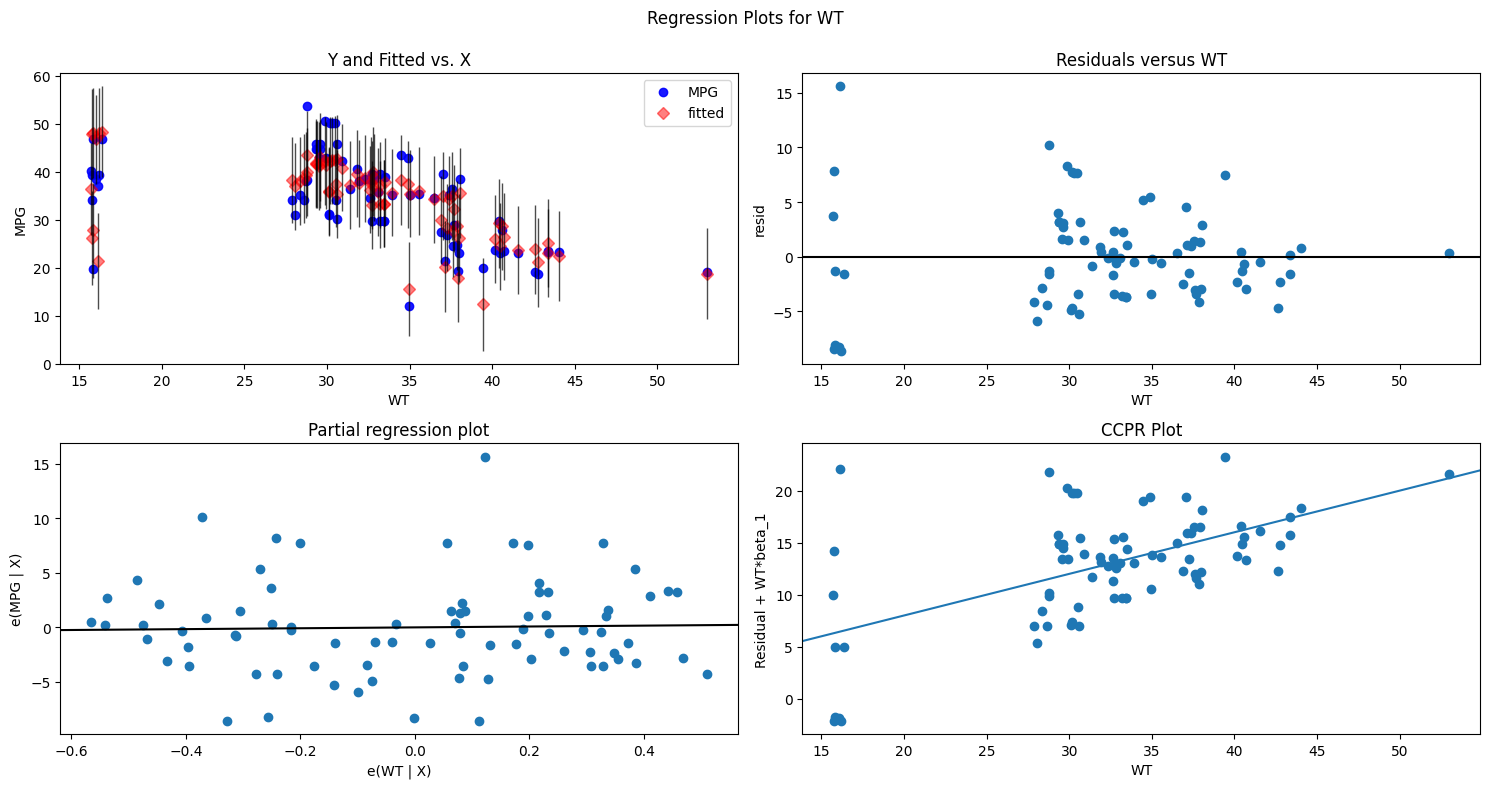

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

In [36]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

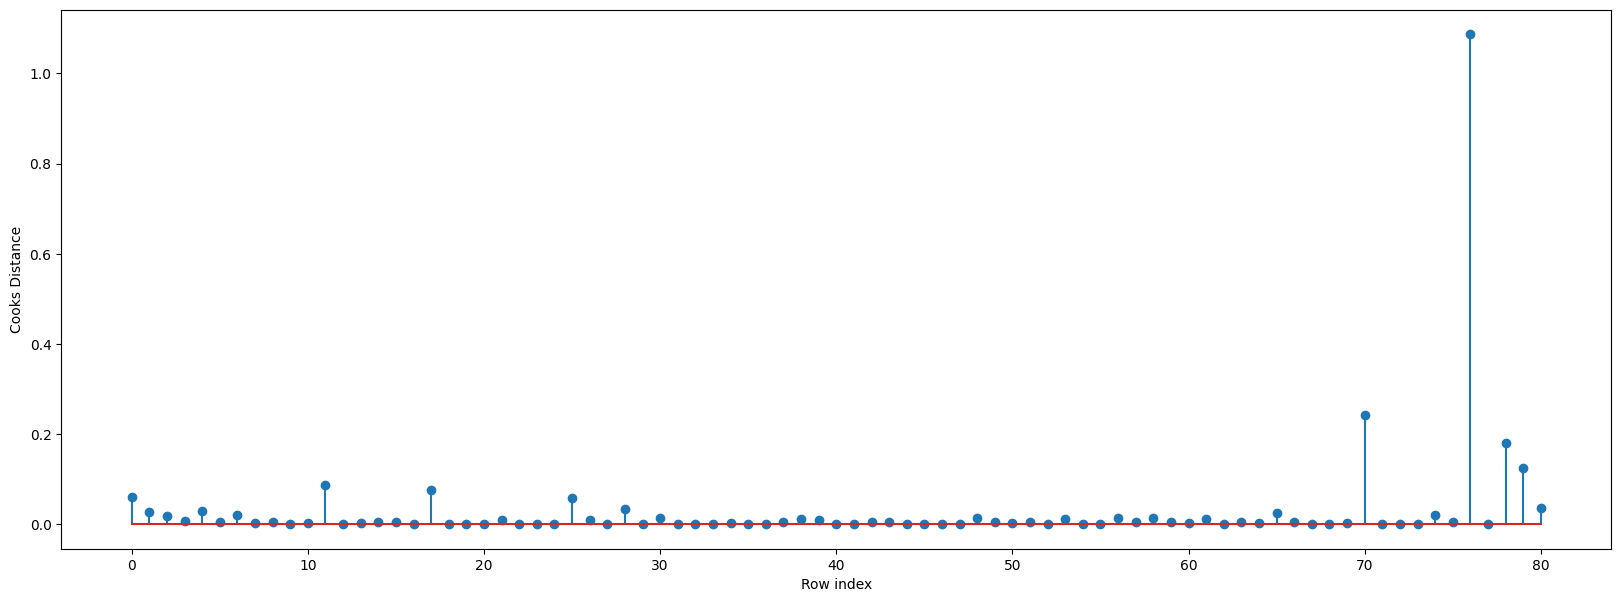

In [39]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()